**K-NN**

 Ko'krak saratonini aniqlash.

Tavsif. Ko'krak saratoni dunyodagi ayollar orasida eng ko'p tarqalgan saraton hisoblanadi. Bu barcha saraton holatlarining 25% tashkil qiladi. Ko'krak saratoni ko'krakdagi hujayralar nazoratsiz o'sishidan boshlanadi. Ushbu hujayralar odatda rentgen nurlari orqali ko'rish mumkin bo'lgan o'simtalarni tahlil qilish orqali aniqlanadi. Quyidagi datasetdan foydalanamiz

In [135]:
import pandas as pd
import numpy as np

In [136]:
url = 'sample_data/breast-canser.csv'
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
230,881972,M,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,...,19.59,24.89,133.50,1189.0,0.1703,0.39340,0.50180,0.25430,0.3109,0.09061
379,9013838,M,11.080,18.83,73.30,361.6,0.12160,0.21540,0.168900,0.063670,...,13.24,32.82,91.76,508.1,0.2184,0.93790,0.84020,0.25240,0.4154,0.14030
403,9047,B,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,...,13.86,23.02,89.69,580.9,0.1172,0.19580,0.18100,0.08388,0.3297,0.07834
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.097300,0.052520,...,10.28,16.38,69.05,300.2,0.1902,0.34410,0.20990,0.10250,0.3038,0.12520
185,874158,B,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,...,11.87,21.18,75.39,437.0,0.1521,0.10190,0.00692,0.01042,0.2933,0.07697
165,8712291,B,14.970,19.76,95.50,690.2,0.08421,0.05352,0.019470,0.019390,...,15.98,25.82,102.30,782.1,0.1045,0.09995,0.07750,0.05754,0.2646,0.06085
318,894329,B,9.042,18.90,60.07,244.5,0.09968,0.19720,0.197500,0.049080,...,10.06,23.40,68.62,297.1,0.1221,0.37480,0.46090,0.11450,0.3135,0.10550
295,891923,B,13.770,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,...,14.67,16.93,94.17,661.1,0.1170,0.10720,0.03732,0.05802,0.2823,0.06794
509,915460,M,15.460,23.95,103.80,731.3,0.11830,0.18700,0.203000,0.085200,...,17.11,36.33,117.70,909.4,0.1732,0.49670,0.59110,0.21630,0.3013,0.10670
239,88330202,M,17.460,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.1365,0.37350,0.32410,0.20660,0.2853,0.08496


In [137]:
df.shape

(569, 32)

Demak, datasetimizda 569 ta satr va 32 ta ustun bor ekan.

---



*Dataset* ko'krakdagi o'simta haqida ma'lumotlarni jamlagan. diagnosis ustuni esa o'zimda rak (M-malignant) toki rak emas (B - benign) anglatadi.

In [138]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


Muvozanat yaxshi emas. 357 va 212 orasida farq katta. Saraton bo'lganlar soni ko'p.
Bu qiymatlarni 0 va 1 ga o'zgartiramiz. M -->1, B--> 0
Buning uchun sklearn tarkibidagi LabelEncoder dan yoki pandas dagi .replace() metodidan foydalanish mumkin.

In [139]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [140]:
#Yoki replace bilan ham almashtirish mumkin
df['diagnosis'] = df['diagnosis'].replace("M",1)
df['diagnosis'] = df['diagnosis'].replace("B",0)
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


ID faqat tartib raqam uchun kerak. ID ustunini tashlab yuboramiz. BU biz uchun biror bir qiymat bermaydi.

In [141]:
df.drop(columns=['id'], inplace = True)

In [142]:
# Korelyatsiya amalini bajaramiz
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Qizilga yaqinlari, ya'ni sariqlarini olamiz, chunki ularda korrelyatsiya yuqori. Ko'k bilan belgilanganlarida esa korellyatsiya juda ham past.

In [143]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

,0
diagnosis,1.000000
concave_points_worst,0.793566
perimeter_worst,0.782914
concave_points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


Biz hozir 32 ta ustun va 569 ta qator bilan ishlayapmiz. Bu qatta ma'lumotlar uchun ancha vaqtni oladi. Bunda biz faqatgina korrelyatsiyasi yuqori bo'lgan ustunlarni olib, qolgan ustunlarni tashlab yuborishimiz mumkin. Bizda kam satr bo'lgani uchun tashlab yuormaymiz. Qatorlar soni katta bo'lsa tashlab yuborsa bo'ladi.

**ML da tayyorlaymiz**

In [144]:
X = df.drop('diagnosis', axis = 1).values # X diagnosisdan boshqa barcha ustunlar qiymatini oladi
y = df['diagnosis'] # y faqat diagnosis ustunini oladi

In [145]:
from sklearn.preprocessing import StandardScaler
#Hamma qiymatlarni standartlashtiramiz. ya'ni [0,1] oraliqqa olib kelamiz. CHunki datasetda qiymarlar har xil.
scaler = StandardScaler()
X = scaler.fit_transform(X)

**ML**

In [146]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#0.2 degani datasetni 20%ni test uchun ajratib olindi
#K-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

KNN modeli yaratib olindi

In [147]:
y_predict = knn.predict(X_test)

**Baholash**

Jaccard Index

In [148]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

np.float64(0.8958333333333334)

**Confusion matrix**

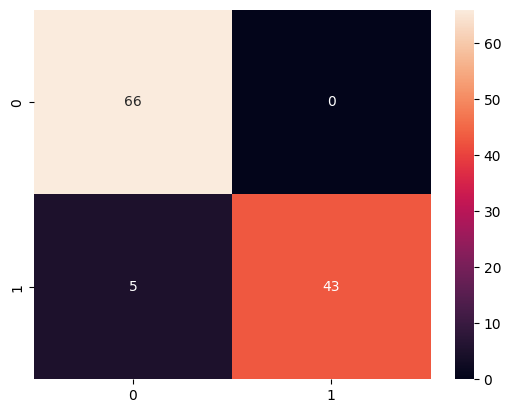

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [150]:
confusion_matrix(y_test, y_predict)

array([[66,  0],
       [ 5, 43]])

:66 tadan hammasini to'gri topibdi, 48 tadan esa 43 tasini to'g'ri topibdi.

**Precision, recall, F1**

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_predict)
recall  = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")


precision=1.0
recall=0.8958333333333334
f1=0.945054945054945
accuracy=0.956140350877193


precision = 1 chiqdi. CHunki 66 tadan 66 tasini topgan.

Bi hozir *accuracy_score, precision_score, recall_score, f1_score* funsiyani chaqirdik. Bunday qilmasdan bitta ***classification_report*** komanda orqali barchasini chaqirish mumkin

In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



*Katta* datasetlar uchun ***Cross-validation***dan foydalanish kk.
**Cross-validation yordamiuda tekshiramiz**

In [153]:
from sklearn.model_selection import  cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
# cross validationni 5 qismga bo'lib tekshiramiz
#Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



**Eng yaxshi k  ni topish**

***for*** yordamida topish mumkin


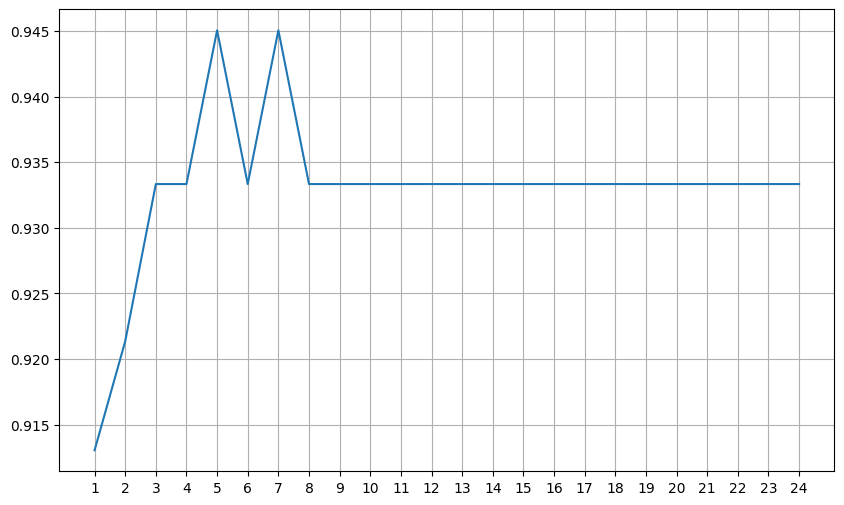

In [154]:
f1 = []
for k in range(1,25):
  knn  = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()


Eng yaxshi k lar soni 5 va 7 ekan.

**GRID Search yordamida**

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5) #cv - corelation validation

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [156]:
knn_gscv.cv_results_

{'mean_fit_time': array([0.00181365, 0.0012774 , 0.00114245, 0.0011549 , 0.0011797 ,
        0.00114021, 0.00114412, 0.00110478, 0.00118656, 0.00117226,
        0.00112605, 0.00109644, 0.00110269, 0.00110645, 0.00112333,
        0.00129232, 0.00110826, 0.00112853, 0.00114994, 0.00130324,
        0.00117912, 0.00149055, 0.00115099, 0.00185308]),
 'std_fit_time': array([9.88545556e-04, 8.79054701e-05, 2.86774640e-05, 3.40713413e-05,
        7.91740682e-05, 2.94693851e-05, 7.59614315e-05, 1.78118945e-05,
        2.66881459e-05, 4.44642404e-05, 1.81855715e-05, 2.88765748e-05,
        9.36107977e-06, 4.81115224e-05, 1.42179056e-05, 2.89394848e-04,
        2.55989175e-05, 3.30598461e-05, 4.02647689e-05, 1.41752580e-04,
        3.22133765e-05, 3.21538986e-04, 2.72555715e-05, 3.90084931e-04]),
 'mean_score_time': array([0.00226192, 0.0021275 , 0.0020112 , 0.00202765, 0.00208983,
        0.00207415, 0.00206947, 0.00217466, 0.00225301, 0.00233164,
        0.00224199, 0.00227375, 0.00240269, 0.00

Bu yerda hammasini vaqt bo'yich abjarilishi bo'yicha chiqarayappdi. Endi bularni faqatgina *rank_test_score* ustuni bo'yicha bajaramiz. Bugun ustun muhim.

In [157]:
knn_gscv.cv_results_['rank_test_score']
# k ni qiymatlarini chiqaramiz.

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16], dtype=int32)

k = 1 da 24, k = 2 da 21, ...

In [158]:
knn_gscv.best_params_

{'n_neighbors': np.int64(9)}

In [159]:
knn_gscv.best_score_

np.float64(0.968390001552554)

Endi k ni qiymatlarini grafigini chiqaramiz.

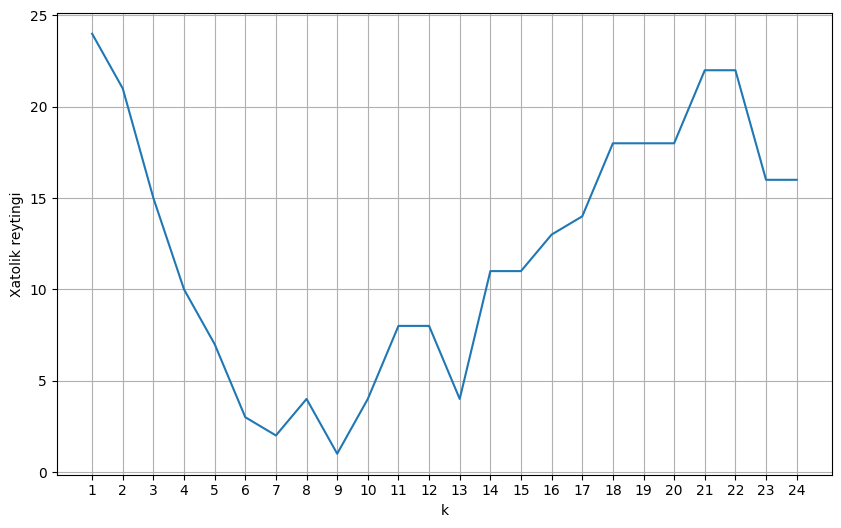

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

Grafikdan ko'rish mumkinki, k = 9 bo'lganda eng yaxshi natijani berar ekan. Ya'ni eng kam xatolikni beradi.